In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from data import C3RData, interpolate

In [2]:
# better plots
sns.set_style('whitegrid')

In [5]:
# load dataset
c3r = C3RData(data_dir="data/")

In [6]:
def get_data(from_dt, to_dt, deident_id=2):
    # get data for a certain case
    # deident_id = 2
    # from_dt = f"2014-05-05 00:00:00"
    # to_dt = f"2014-05-08 00:00:00"

    # destructure data
    cgm_data, meal_data, insulin_data = c3r.get_case(deident_id, from_dt, to_dt)
    data_t, data_CGM, data_CHO, data_insulin = interpolate(cgm_data, meal_data, insulin_data)

    # normalize time
    data_t -= data_t[0]

    # scale down to minutes
    data_t = data_t / 60.0

    # negate delay
    data_CHO = np.roll(data_CHO, -200)
    data_insulin = np.roll(data_insulin, -200)

    # clean
    data_CHO = np.nan_to_num(data_CHO, nan=data_CHO[0])
    data_insulin = np.nan_to_num(data_insulin, nan=data_insulin[0])

    return data_t, data_CGM, data_CHO, data_insulin

In [7]:
from_dt = f"2014-05-05 00:00:00"
to_dt = f"2014-05-08 00:00:00"

train_data = get_data(from_dt, to_dt, deident_id=2)

In [8]:
from_dt = f"2014-05-09 00:00:00"
to_dt = f"2014-05-11 00:00:00"

test1_data = get_data(from_dt, to_dt, deident_id=2)

In [9]:
from_dt = f"2014-05-12 00:00:00"
to_dt = f"2014-05-14 00:00:00"

test2_data = get_data(from_dt, to_dt, deident_id=2)

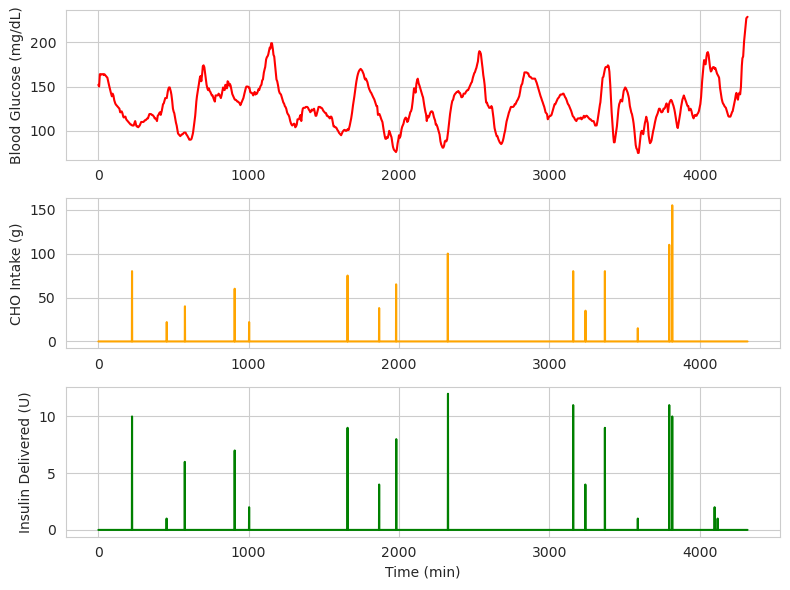

In [21]:
plt.figure(figsize=(8, 6))
plt.subplot(3, 1, 1)
plt.plot(train_data[0], train_data[1], label="CGM", color="r")
plt.ylabel("Blood Glucose (mg/dL)")
plt.subplot(3, 1, 2)
plt.plot(train_data[0], train_data[2], label="CHO", color="orange")
plt.ylabel("CHO Intake (g)")
plt.subplot(3, 1, 3)
plt.plot(train_data[0], train_data[3], label="Insulin", color="g")
plt.ylabel("Insulin Delivered (U)")
plt.xlabel("Time (min)")
plt.tight_layout()
plt.show()

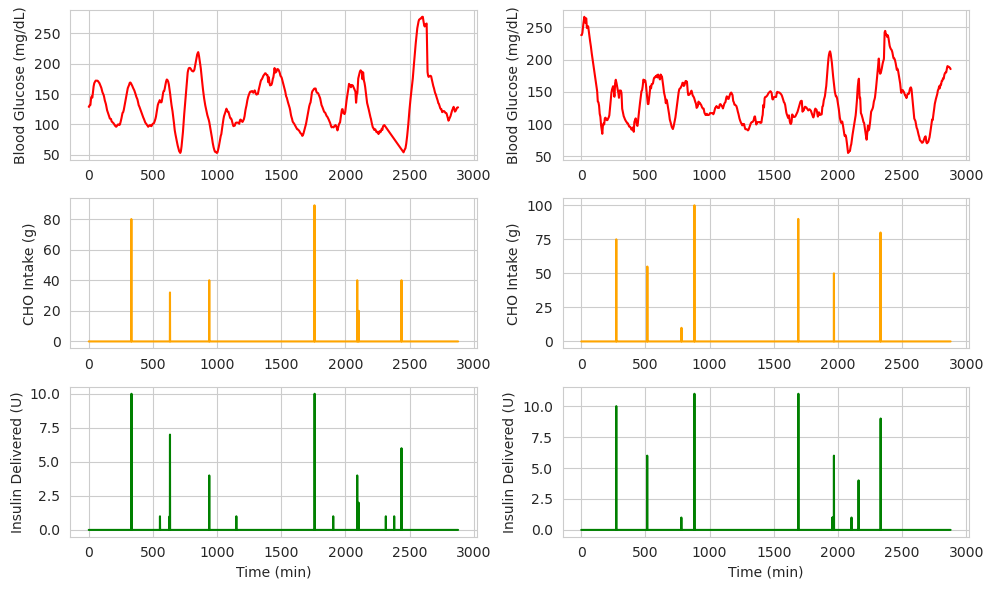

In [29]:
plt.figure(figsize=(10, 6))

plt.subplot(3, 2, 1)
plt.plot(test1_data[0], test1_data[1], label="CGM", color="r")
plt.ylabel("Blood Glucose (mg/dL)")
plt.subplot(3, 2, 3)
plt.plot(test1_data[0], test1_data[2], label="CHO", color="orange")
plt.ylabel("CHO Intake (g)")
plt.subplot(3, 2, 5)
plt.plot(test1_data[0], test1_data[3], label="Insulin", color="g")
plt.ylabel("Insulin Delivered (U)")
plt.xlabel("Time (min)")

plt.subplot(3, 2, 2)
plt.plot(test2_data[0], test2_data[1], label="CGM", color="r")
plt.ylabel("Blood Glucose (mg/dL)")
plt.subplot(3, 2, 4)
plt.plot(test2_data[0], test2_data[2], label="CHO", color="orange")
plt.ylabel("CHO Intake (g)")
plt.subplot(3, 2, 6)
plt.plot(test2_data[0], test2_data[3], label="Insulin", color="g")
plt.ylabel("Insulin Delivered (U)")
plt.xlabel("Time (min)")

plt.tight_layout()
plt.show()

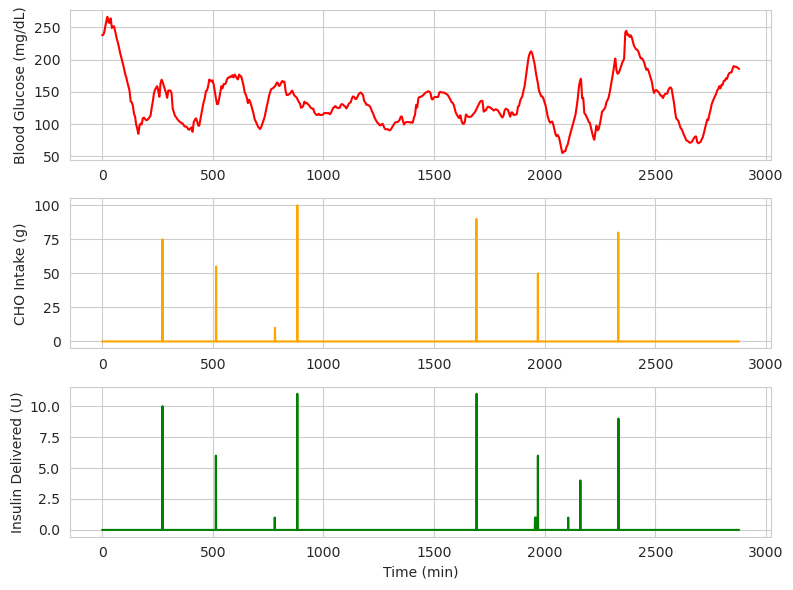

In [23]:
plt.figure(figsize=(8, 6))
plt.subplot(3, 1, 1)
plt.plot(test2_data[0], test2_data[1], label="CGM", color="r")
plt.ylabel("Blood Glucose (mg/dL)")
plt.subplot(3, 1, 2)
plt.plot(test2_data[0], test2_data[2], label="CHO", color="orange")
plt.ylabel("CHO Intake (g)")
plt.subplot(3, 1, 3)
plt.plot(test2_data[0], test2_data[3], label="Insulin", color="g")
plt.ylabel("Insulin Delivered (U)")
plt.xlabel("Time (min)")
plt.tight_layout()
plt.show()